# Ready-to-use pipelines

As Python becomes increasingly popular in the bioimaging domain, efforts are also made to simplify its usage. For example the sort of standard workflows we have seen before with filtering + thresholding + labelling can eaisly be "packaged" into single functions. We here explore the library with the very long name [napari-segment-blobs-and-things-with-membranes (nsbatwm)](https://github.com/haesleinhuepf/napari-segment-blobs-and-things-with-membranes). It offers workflows directly in napari, but the functions are also available to be integrated in a script.

In [2]:
import napari_segment_blobs_and_things_with_membranes as nsbatwm 
import skimage
from microfilm.microplot import microshow

## Script

We use again a simple image with nuclei that we want to segment:

In [47]:
image = skimage.io.imread('../data/cellaltlas/19838_1252_F8_1.tiff')

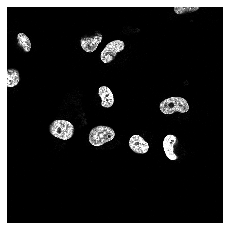

In [49]:
microshow(image[:,:,2]);

Now we use a function that combines guassian filtering and Otsu thresholdin plus labelling. As parameter, we can set how precise the outline is:

In [50]:
labels = nsbatwm.gauss_otsu_labeling(image[:,:,2], outline_sigma=3)

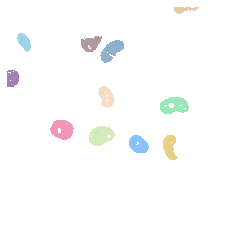

In [52]:
microshow(labels, cmaps='segmentation');

In one single step we obtain our segmentation. Note that this approach has some limitations. For example you don't have access to intermediate steps. In the example above, before labeling we might have wanted to fill the holes in the nuclei. If we want to do that now, we have to revert the labels to a binary image and then labele again.

# napari

We can also exectute these functions directly in napari. This is very useful when you are exploring different solutions:

In [56]:
import napari
from napari.utils import nbscreenshot

In [54]:
viewer = napari.Viewer()

Assistant skips harvesting pyclesperanto as it's not installed.


/Users/gw18g940/mambaforge/envs/micpy/lib/python3.9/site-packages/napari_tools_menu/__init__.py:179: FutureWarning: Public access to Window.qt_viewer is deprecated and will be removed in
v0.5.0. It is considered an "implementation detail" of the napari
application, not part of the napari viewer model. If your use case
requires access to qt_viewer, please open an issue to discuss.
  self.tools_menu = ToolsMenu(self, self.qt_viewer.viewer)


In [55]:
viewer.add_image(image, channel_axis=2)

[<Image layer 'Image' at 0x18e781a90>,
 <Image layer 'Image [1]' at 0x17fd89490>,
 <Image layer 'Image [2]' at 0x18f588e20>]

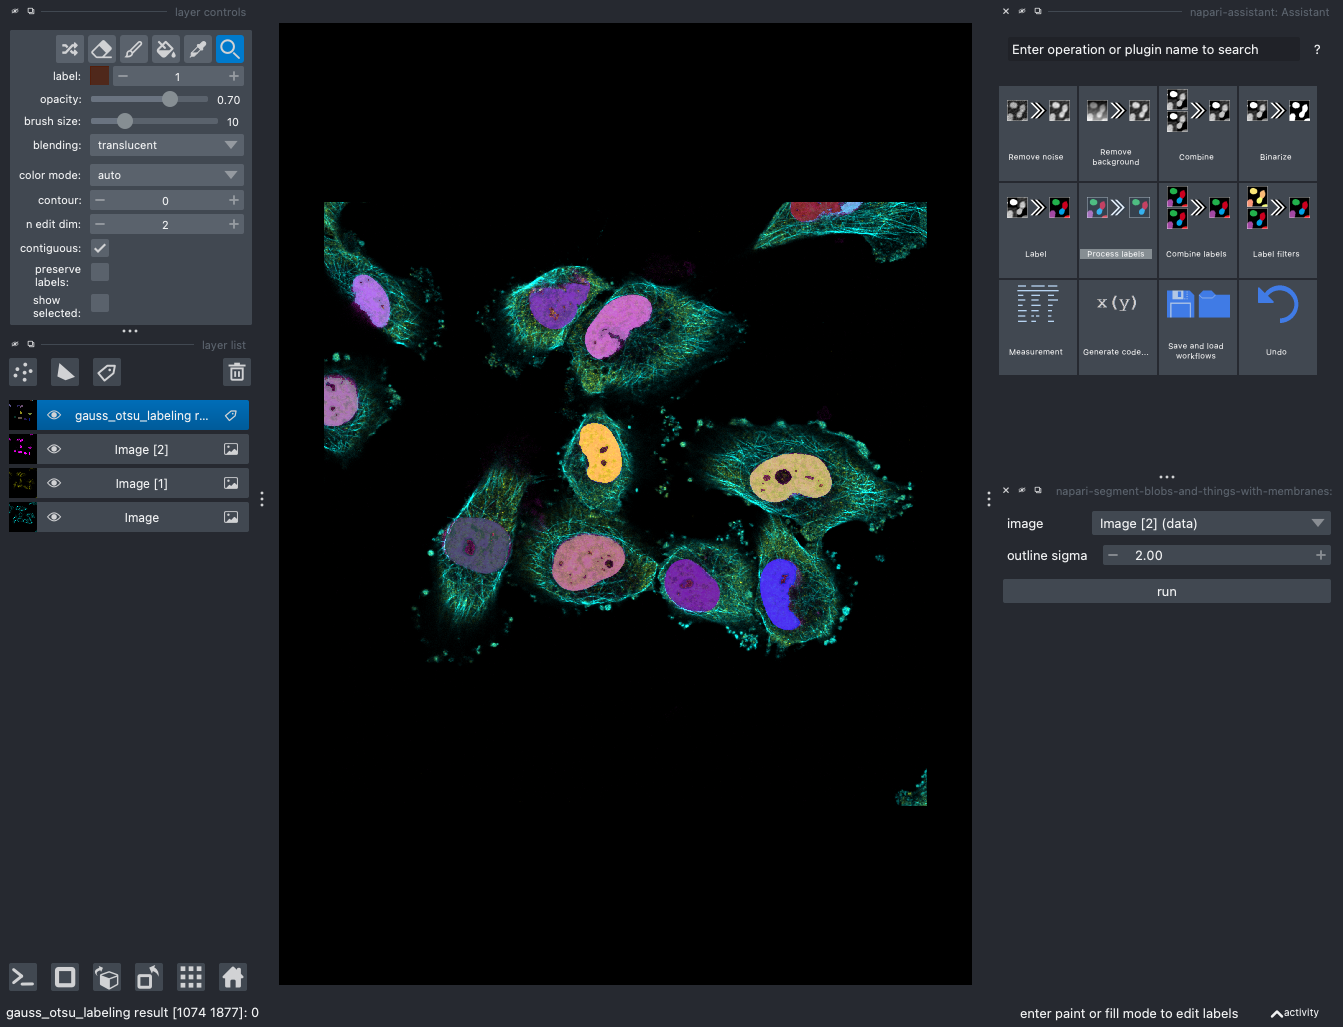

In [57]:
nbscreenshot(viewer)

In [ ]:
s